In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
cwd = os.getcwd()

In [3]:
file1 = "TrafficData/I10-and-I17-1year/I10-and-I17-1year.csv"
df1 = pd.read_csv(file1)

In [4]:
print(df1.columns)

Index(['tmc_code', 'measurement_tstamp', 'speed', 'historical_average_speed',
       'reference_speed', 'travel_time_seconds', 'confidence_score', 'cvalue',
       'Inrix 2013', 'Inrix 2019'],
      dtype='object')


In [5]:
print(df1.shape)

(95617671, 10)


In [6]:
print(df1.head())

    tmc_code   measurement_tstamp  speed  historical_average_speed  \
0  115-04201  2024-09-24 00:00:00   72.0                      68.0   
1  115-04201  2024-09-24 00:01:00   73.0                      68.0   
2  115-04201  2024-09-24 00:02:00   73.0                      68.0   
3  115-04201  2024-09-24 00:03:00   73.0                      68.0   
4  115-04201  2024-09-24 00:04:00   73.0                      68.0   

   reference_speed  travel_time_seconds  confidence_score  cvalue  Inrix 2013  \
0             68.0                15.97              30.0   100.0        17.0   
1             68.0                15.75              30.0   100.0        17.0   
2             68.0                15.75              30.0   100.0        17.0   
3             68.0                15.75              30.0   100.0        17.0   
4             68.0                15.75              30.0   100.0        17.0   

   Inrix 2019  
0          36  
1          36  
2          36  
3          36  
4          3

In [7]:
# Check for missing values.
print(df1.isnull().sum())

tmc_code                          0
measurement_tstamp                0
speed                             0
historical_average_speed          0
reference_speed                   0
travel_time_seconds               0
confidence_score                  0
cvalue                       442655
Inrix 2013                  1041176
Inrix 2019                        0
dtype: int64


In [8]:
col = df1['measurement_tstamp']
print(col)

0           2024-09-24 00:00:00
1           2024-09-24 00:01:00
2           2024-09-24 00:02:00
3           2024-09-24 00:03:00
4           2024-09-24 00:04:00
                   ...         
95617666    2025-09-23 09:11:00
95617667    2025-09-23 09:12:00
95617668    2025-09-23 09:13:00
95617669    2025-09-23 09:14:00
95617670    2025-09-23 09:15:00
Name: measurement_tstamp, Length: 95617671, dtype: object


In [19]:
# Look at the tmc codes.
tmc = df1['tmc_code']
tmc_np = tmc.to_numpy()

In [20]:
print(tmc_np)

['115-04201' '115-04201' '115-04201' ... '115N04191' '115N04191'
 '115N04191']


In [37]:
# Get the data table where TMC code is '115-04201'.
data_zone = df1[df1['tmc_code'] == '115-04201']

# Get speeds.
speed_zone = data_zone['speed'].to_numpy()
time_zone = data_zone['travel_time_seconds'].to_numpy()
inrix_zone = data_zone['Inrix 2019'].to_numpy()

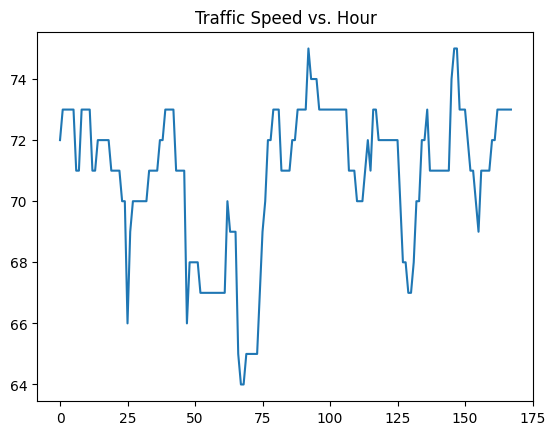

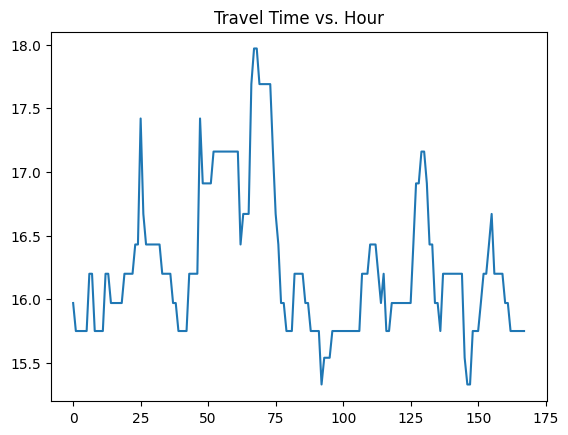

In [36]:
i = np.arange(len(speed_zone))

fig, ax = plt.subplots()
plt.title("Traffic Speed vs. Hour")
ax.plot(i[:168], speed_zone[:168], label='Traffic Speed')
plt.show()

fig, ax = plt.subplots()
plt.title("Travel Time vs. Hour")
ax.plot(i[:168], time_zone[:168], label='Travel Time Seconds')
plt.show()

In [41]:
# Get the data table where TMC code is '115-04201'.
data_other = df1[df1['tmc_code'] == '115N04191']

# Get speeds.
speed_other = data_other['speed'].to_numpy()
time_other = data_other['travel_time_seconds'].to_numpy()
inrix_other = data_other['Inrix 2019'].to_numpy()

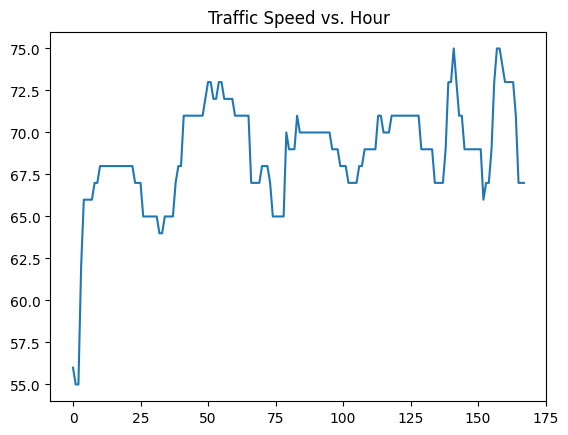

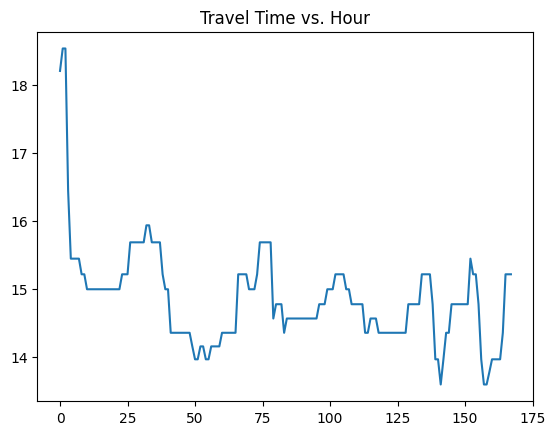

In [42]:
j = np.arange(len(speed_other))

fig, ax = plt.subplots()
plt.title("Traffic Speed vs. Hour")
ax.plot(j[:168], speed_other[:168], label='Traffic Speed')
plt.show()

fig, ax = plt.subplots()
plt.title("Travel Time vs. Hour")
ax.plot(j[:168], time_other[:168], label='Travel Time Seconds')
plt.show()

In [63]:
# Split the data into weeks.
chunk_size = 7 * 24 * 60
z1_chunks = []
k = 0
while(k < data_zone.shape[0]):
    z1_chunks.append(data_zone.iloc[k:k+chunk_size])
    k += chunk_size

# For every chunk, pointwise average.
z1_avg_week_speed = np.zeros(chunk_size)
for chunk in z1_chunks[:-1]:
    z1_avg_week_speed += chunk['speed'].to_numpy()
z1_avg_week_speed /= (len(z1_chunks)-1)

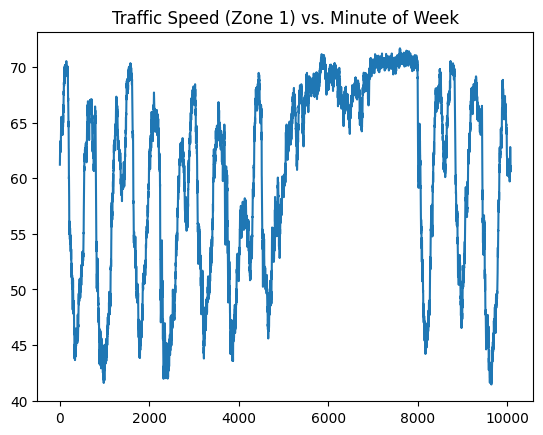

In [66]:
fig, ax = plt.subplots()
plt.title("Traffic Speed (Zone 1) vs. Minute of Week")
ax.plot(np.arange(chunk_size) + 1, z1_avg_week_speed, label='Average by Minute Weekly Speed')
plt.show()

In [67]:
# Split the data into weeks.
chunk_size = 7 * 24 * 60
z2_chunks = []
k = 0
while(k < data_other.shape[0]):
    z2_chunks.append(data_other.iloc[k:k+chunk_size])
    k += chunk_size

# For every chunk, pointwise average.
z2_avg_week_speed = np.zeros(chunk_size)
for chunk in z2_chunks[:-1]:
    z2_avg_week_speed += chunk['speed'].to_numpy()
z2_avg_week_speed /= (len(z2_chunks)-1)

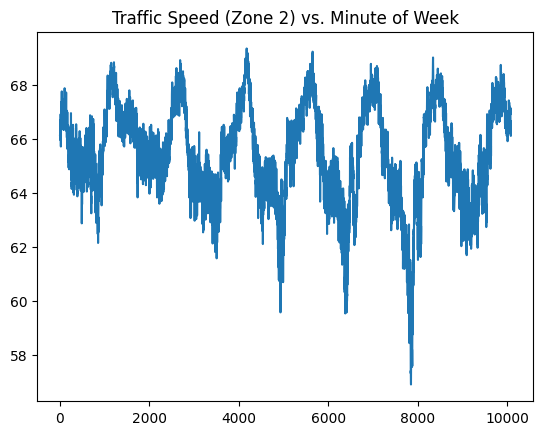

In [68]:
fig, ax = plt.subplots()
plt.title("Traffic Speed (Zone 2) vs. Minute of Week")
ax.plot(np.arange(chunk_size) + 1, z2_avg_week_speed, label='Average by Minute Weekly Speed')
plt.show()